# Steps 


1.   Reading and Understanding Data
2.   Exploratory Data Analysis
        - Data Cleaning
        - Univariate Analysis
        - Bivariate Analysis
        - Multivariate Analysis
3.   Outliers Treatment
4.   Scaling Data
5.   Creating k means clustering and visualizing clusters formed
6.   Report countries

## Step 1: Reading and Understanding Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('Data_Negara_HELP.csv')
df.head(2)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


informasi data

In [ ]:
df = pd.read_csv('Data_Negara_HELP.csv', na_values=['-','na'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.fillna(method='ffill', inplace=True)
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Data Statistik

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA
#### Univariate analysis

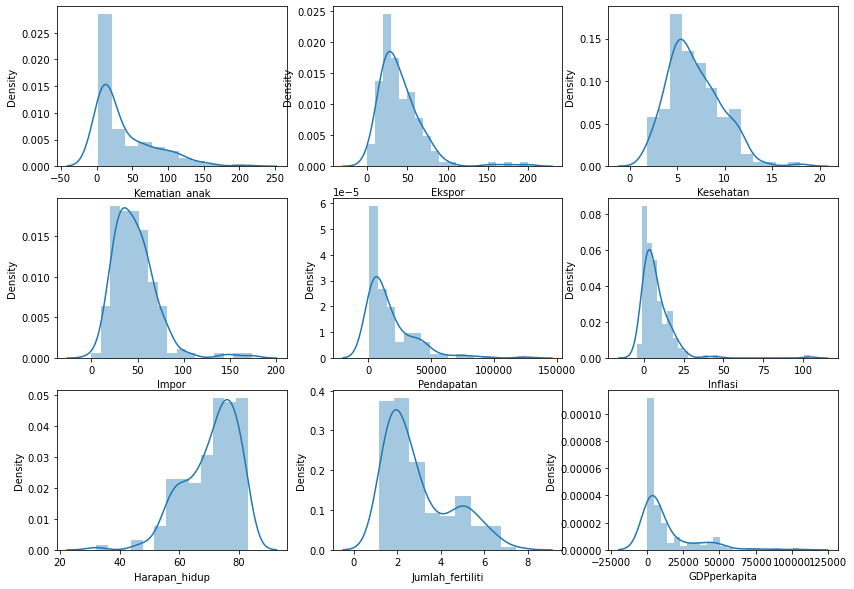

In [ ]:
plt.figure(figsize=(14,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

#### Bivariate

Sorting Data berdasarkan GDP perkapita dari yang terendah

In [ ]:
dfsort =df.sort_values('GDPperkapita', ascending=True).reset_index(drop=True)
dfsort

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
1,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
2,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
3,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
4,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
162,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
163,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
164,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
165,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800


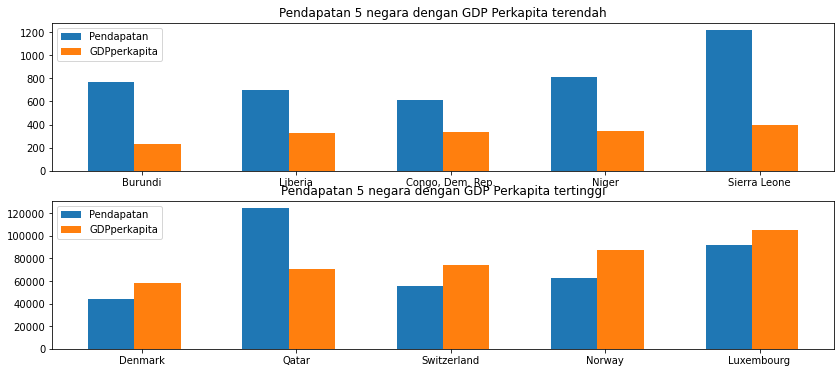

In [ ]:
x = np.arange(5)
width = 0.3
plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.bar(x, dfsort['Pendapatan'].head(), width, label='Pendapatan')
plt.bar(x+0.3, dfsort['GDPperkapita'].head(), width, label='GDPperkapita')
plt.xticks(x+0.2, labels=dfsort['Negara'].head())
plt.title('Pendapatan 5 negara dengan GDP Perkapita terendah')
plt.legend()


plt.subplot(2,1,2)
plt.bar(x, dfsort['Pendapatan'].tail(), width, label='Pendapatan')
plt.bar(x+0.3, dfsort['GDPperkapita'].tail(), width, label='GDPperkapita')
plt.xticks(x+0.2, labels=dfsort['Negara'].tail())
plt.title('Pendapatan 5 negara dengan GDP Perkapita tertinggi')
plt.legend()
plt.show()

#### Multivariate

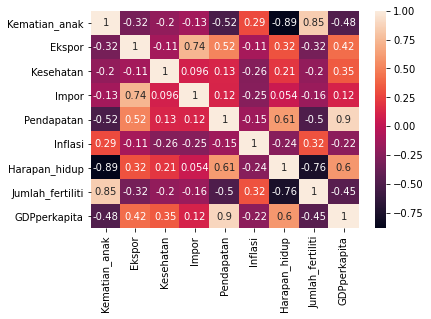

In [ ]:
sns.heatmap(dfsort.corr(), annot=True, fmt='.2g');

nilai korelasi berkisar antara 1 sampai -1, nilai semakin mendekati 1 atau -1 berarti hubungan antara dua variabel semakin kuat.
Sebaliknya, jika nilai mendekati 0 berarti hubungan antara dua variabel semakin lemah. Nilai korelasi positif menunjukkan hubungan searah 
(Var1 naik, maka Var2 naik) sementara nilai korelasi negatif menunjukkan hubungan terbalik (Var1 naik, maka Var2 turun). Dalam kasus ini 
saya mengambil 3 nilai korelasi yang kuat untuk menyelesaikannya yaitu
1. Variabel Pendapatan dengan Variabel GDP Perkapita bernilai korelasi 0.9
2. Variabel Kematian Anak dengan Variabel Harapan Hidup bernilai korelasi -0.89
3. Variabel Kematian Anak dengan Variabel Jumlah fertilit bernilai korelasi 0.85


#### Outlier Treatment

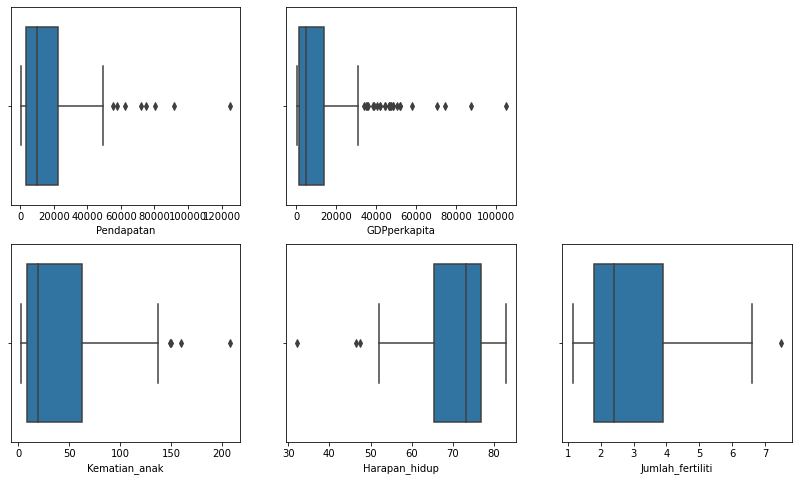

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.boxplot('Pendapatan', data=dfsort)
plt.subplot(2,3,2)
sns.boxplot('GDPperkapita', data=dfsort)
plt.subplot(2,3,4)
sns.boxplot('Kematian_anak', data=dfsort)
plt.subplot(2,3,5)
sns.boxplot('Harapan_hidup', data=dfsort)
plt.subplot(2,3,6)
sns.boxplot('Jumlah_fertiliti', data=dfsort)
plt.show()

In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

df2 = remove_outlier(dfsort[['Negara','Pendapatan','GDPperkapita','Kematian_anak','Jumlah_fertiliti','Harapan_hidup']])

df2.dropna(axis=0, inplace=True)
df2.reset_index(drop=True)

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup
0,Burundi,764.0,231.0,93.6,6.26,57.7
1,Liberia,700.0,327.0,89.3,5.02,60.8
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5
3,Madagascar,1390.0,413.0,62.2,4.60,60.8
4,Mozambique,918.0,419.0,101.0,5.56,54.5
...,...,...,...,...,...,...
132,Greece,28700.0,26900.0,3.9,1.48,80.4
133,Bahamas,22900.0,28000.0,13.8,1.86,73.8
134,Israel,29600.0,30600.0,4.6,3.03,81.4
135,Spain,32500.0,30700.0,3.8,1.37,81.9


## Scaling Data

Scaling Data pertama berdasarkan Variabel Pendapatan dengan GDP PerKapita karena memiliki nilai korelasi yang kuat ke satu

In [ ]:
#Lakukan rescaling data menggunakan StandardScaler
df3=df2.iloc[:, [1,2]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df3.astype(float))

#Lakukan clustering menggunakan kmeans clustering dengan k =2
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=48).fit(df_std)
labels1 = kmeans1.labels_
new_df = pd.DataFrame(data=df_std, columns=['Pendapatan','GDPperkapita'])
new_df['label1_kmeans'] = labels1
new_df

,Pendapatan,GDPperkapita,label1_kmeans
0,-1.067311,-0.887261,0
1,-1.073801,-0.873787,0
2,-1.083030,-0.872804,0
3,-1.003826,-0.861715,0
4,-1.051693,-0.860873,0
...,...,...,...
132,1.765762,2.856028,1
133,1.177567,3.010425,1
134,1.857033,3.375364,1
135,2.151131,3.389400,1


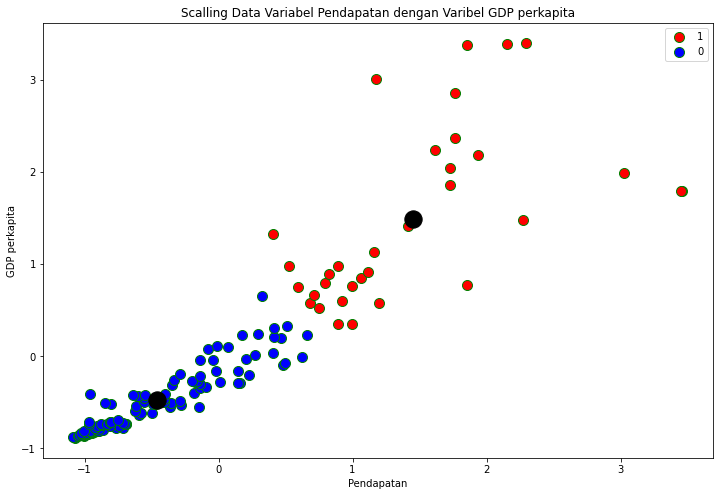

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==1], new_df['GDPperkapita'][new_df.label1_kmeans==1],label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label1_kmeans==0], new_df['GDPperkapita'][new_df.label1_kmeans==0], label='0',c='blue', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Pendapatan')
plt.ylabel('GDP perkapita')
plt.legend()
plt.title('Scalling Data Variabel Pendapatan dengan Varibel GDP perkapita')
plt.show()

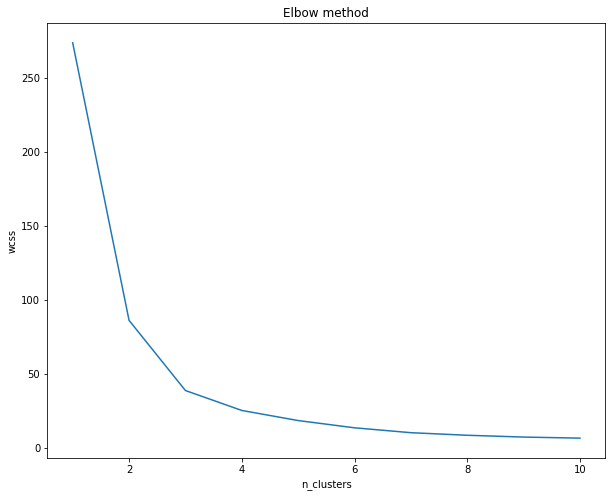

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
#Gunakan k=4 (rekomendasi methode Elbow)  
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels2 = kmeans2.labels_
new_df['label2_kmeans'] = labels2
new_df

,Pendapatan,GDPperkapita,label1_kmeans,label2_kmeans
0,-1.067311,-0.887261,0,0
1,-1.073801,-0.873787,0,0
2,-1.083030,-0.872804,0,0
3,-1.003826,-0.861715,0,0
4,-1.051693,-0.860873,0,0
...,...,...,...,...
132,1.765762,2.856028,1,3
133,1.177567,3.010425,1,3
134,1.857033,3.375364,1,3
135,2.151131,3.389400,1,3


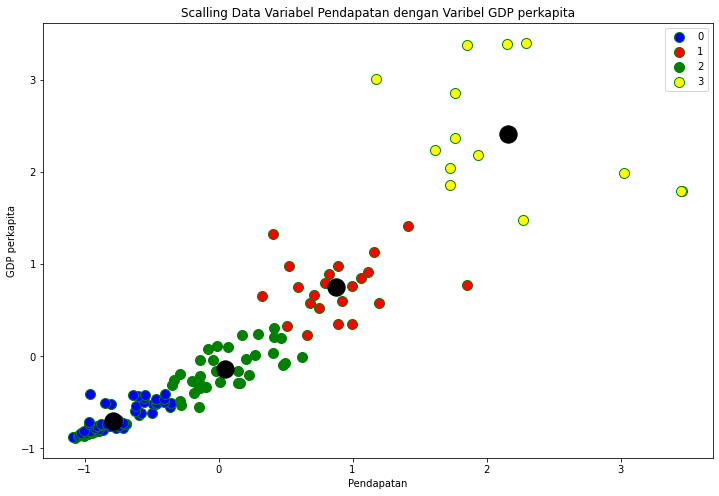

In [ ]:
#visualisasi k=4
plt.figure(figsize=(12,8))
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==0], new_df['GDPperkapita'][new_df.label2_kmeans==0],label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==1], new_df['GDPperkapita'][new_df.label2_kmeans==1],label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==2], new_df['GDPperkapita'][new_df.label2_kmeans==2],label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Pendapatan'][new_df.label2_kmeans==3], new_df['GDPperkapita'][new_df.label2_kmeans==3], label='3',c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Pendapatan')
plt.ylabel('GDP perkapita')
plt.legend()
plt.title('Scalling Data Variabel Pendapatan dengan Varibel GDP perkapita')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.6495969596992145
0.5592041769140145


In [ ]:
#summary
df2['K_means_labels'] = kmeans2.labels_
df2

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels
0,Burundi,764.0,231.0,93.6,6.26,57.7,0
1,Liberia,700.0,327.0,89.3,5.02,60.8,0
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0
5,Madagascar,1390.0,413.0,62.2,4.60,60.8,0
6,Mozambique,918.0,419.0,101.0,5.56,54.5,0
...,...,...,...,...,...,...,...
137,Greece,28700.0,26900.0,3.9,1.48,80.4,3
138,Bahamas,22900.0,28000.0,13.8,1.86,73.8,3
139,Israel,29600.0,30600.0,4.6,3.03,81.4,3
140,Spain,32500.0,30700.0,3.8,1.37,81.9,3


In [ ]:
low_economy =df2[df2['K_means_labels']==0].reset_index(drop=True)
low_economy

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels
0,Burundi,764.0,231.0,93.6,6.26,57.7,0
1,Liberia,700.0,327.0,89.3,5.02,60.8,0
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0
3,Madagascar,1390.0,413.0,62.2,4.60,60.8,0
4,Mozambique,918.0,419.0,101.0,5.56,54.5,0
...,...,...,...,...,...,...,...
60,Samoa,5400.0,3450.0,18.9,4.34,71.5,0
61,Angola,5900.0,3530.0,119.0,6.16,60.1,0
62,Tonga,4980.0,3550.0,17.4,3.91,69.9,0
63,Timor-Leste,1850.0,3600.0,62.6,6.23,71.1,0


Scaling Data kedua berdasarkan Variabel Kematian Anak dengan Harapan hidup karena memiliki nilai korelasi yang kuat ke dua

In [ ]:
#Lakukan rescaling data menggunakan StandardScaler
df4=low_economy.iloc[:, [3,5]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std1 = sc.fit_transform(df4.astype(float))
#Lakukan clustering menggunakan kmeans clustering dengan k =2
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters = 2, random_state=48).fit(df_std1)
labels3 = kmeans3.labels_
new_df1 = pd.DataFrame(data=df_std1, columns=['Kematian_anak','Harapan_hidup'])
new_df1['label3_kmeans'] = labels3
new_df1

,Kematian_anak,Harapan_hidup,label3_kmeans
0,0.886076,-1.070945,0
1,0.757636,-0.570375,0
2,1.555160,-1.103239,0
3,-0.051836,-0.570375,0
4,1.107113,-1.587661,0
...,...,...,...
60,-1.345198,1.157395,1
61,1.644769,-0.683407,0
62,-1.390003,0.899037,1
63,-0.039888,1.092806,1


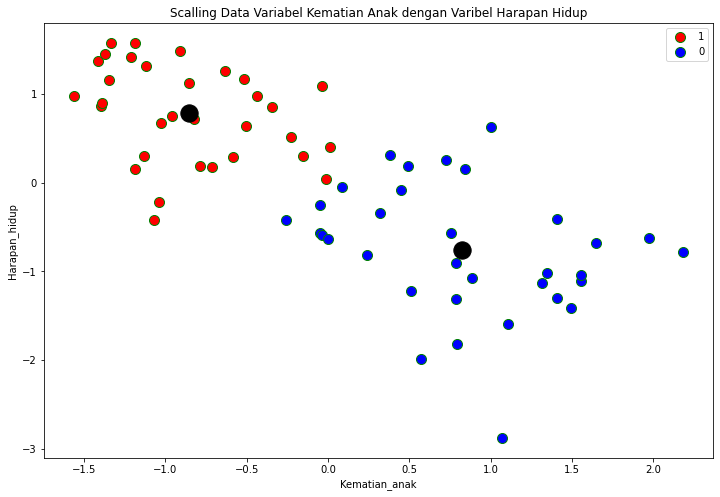

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kematian_anak'][new_df1.label3_kmeans==1], new_df1['Harapan_hidup'][new_df1.label3_kmeans==1],label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label3_kmeans==0], new_df1['Harapan_hidup'][new_df1.label3_kmeans==0],label='0', c='blue', s=100, edgecolors='green')

plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
plt.title('Scalling Data Variabel Kematian Anak dengan Varibel Harapan Hidup')
plt.legend()
plt.show()

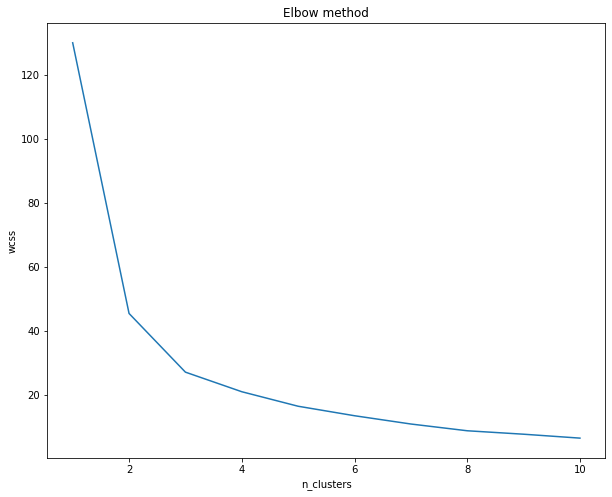

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans4 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std1)
labels4 = kmeans4.labels_
new_df1['label4_kmeans'] = labels4
new_df1

,Kematian_anak,Harapan_hidup,label3_kmeans,label4_kmeans
0,0.886076,-1.070945,0,2
1,0.757636,-0.570375,0,2
2,1.555160,-1.103239,0,2
3,-0.051836,-0.570375,0,0
4,1.107113,-1.587661,0,2
...,...,...,...,...
60,-1.345198,1.157395,1,1
61,1.644769,-0.683407,0,2
62,-1.390003,0.899037,1,1
63,-0.039888,1.092806,1,1


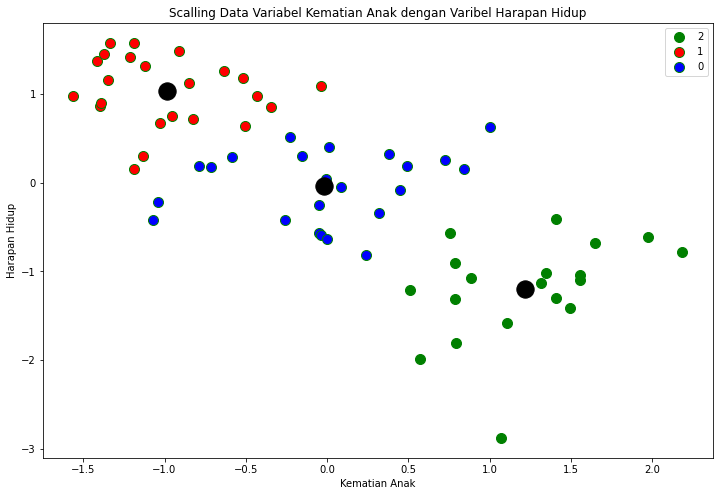

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(new_df1['Kematian_anak'][new_df1.label4_kmeans==2], new_df1['Harapan_hidup'][new_df1.label4_kmeans==2],label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label4_kmeans==1], new_df1['Harapan_hidup'][new_df1.label4_kmeans==1],label='1',c='red', s=100, edgecolors='green')
plt.scatter(new_df1['Kematian_anak'][new_df1.label4_kmeans==0], new_df1['Harapan_hidup'][new_df1.label4_kmeans==0],label='0', c='blue', s=100, edgecolors='green')

plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kematian Anak')
plt.ylabel('Harapan Hidup')
plt.title('Scalling Data Variabel Kematian Anak dengan Varibel Harapan Hidup')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std1, labels= labels3))
print(silhouette_score(df_std1, labels= labels4))

0.5181147806371592
0.45505298628919194


In [ ]:
#summary
low_economy['K_means_labels2'] = kmeans4.labels_
low_economy

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels,K_means_labels2
0,Burundi,764.0,231.0,93.6,6.26,57.7,0,2
1,Liberia,700.0,327.0,89.3,5.02,60.8,0,2
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0,2
3,Madagascar,1390.0,413.0,62.2,4.60,60.8,0,0
4,Mozambique,918.0,419.0,101.0,5.56,54.5,0,2
...,...,...,...,...,...,...,...,...
60,Samoa,5400.0,3450.0,18.9,4.34,71.5,0,1
61,Angola,5900.0,3530.0,119.0,6.16,60.1,0,2
62,Tonga,4980.0,3550.0,17.4,3.91,69.9,0,1
63,Timor-Leste,1850.0,3600.0,62.6,6.23,71.1,0,1


In [ ]:
fix =low_economy[low_economy['K_means_labels2']==2].reset_index(drop=True)
fix

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels,K_means_labels2
0,Burundi,764.0,231.0,93.6,6.26,57.7,0,2
1,Liberia,700.0,327.0,89.3,5.02,60.8,0,2
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0,2
3,Mozambique,918.0,419.0,101.0,5.56,54.5,0,2
4,Malawi,1030.0,459.0,90.5,5.31,53.1,0,2
5,Togo,1210.0,488.0,90.3,4.87,58.7,0,2
6,Guinea-Bissau,1390.0,547.0,114.0,5.05,55.6,0,2
7,Afghanistan,1610.0,553.0,90.2,5.82,56.2,0,2
8,Burkina Faso,1430.0,575.0,116.0,5.87,57.9,0,2
9,Uganda,1540.0,595.0,81.0,6.15,56.8,0,2


Scaling Data ketiga berdasarkan Variabel Kematian Anak dengan Jumlah Fertiliti karena memiliki nilai korelasi yang kuat ke tiga

In [ ]:
df5=fix.iloc[:, [3,4]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std2 = sc.fit_transform(df5.astype(float))
#Lakukan clustering menggunakan kmeans clustering dengan k =2
from sklearn.cluster import KMeans

kmeans5 = KMeans(n_clusters = 2, random_state=48).fit(df_std2)
labels5 = kmeans5.labels_
new_df2 = pd.DataFrame(data=df_std2, columns=['Kematian_anak','Jumlah_fertiliti'])
new_df2['label5_kmeans'] = labels5
new_df2

,Kematian_anak,Jumlah_fertiliti,label5_kmeans
0,-0.732041,1.030356,1
1,-1.015087,-0.683993,1
2,0.742434,1.417467,0
3,-0.244937,0.062578,1
4,-0.936098,-0.283057,1
5,-0.949263,-0.891374,1
6,0.610785,-0.642517,1
7,-0.955845,0.422038,1
8,0.742434,0.491165,0
9,-1.561433,0.878277,1


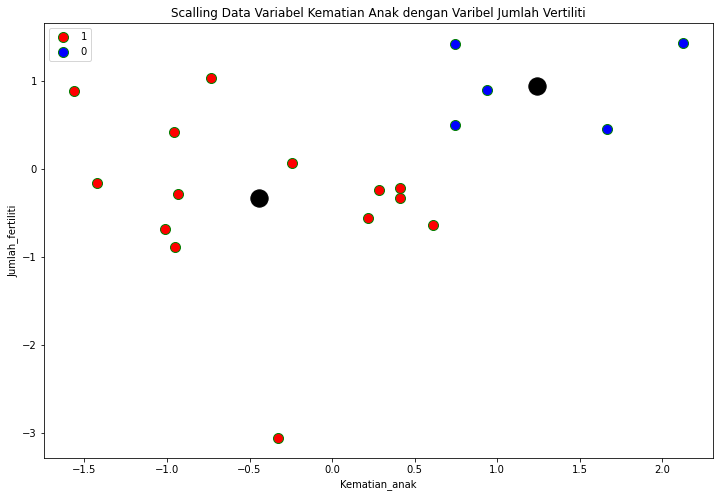

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df2['Kematian_anak'][new_df2.label5_kmeans==1], new_df2['Jumlah_fertiliti'][new_df2.label5_kmeans==1],label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label5_kmeans==0], new_df2['Jumlah_fertiliti'][new_df2.label5_kmeans==0],label='0', c='blue', s=100, edgecolors='green')

plt.scatter(kmeans5.cluster_centers_[:,0], kmeans5.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.title('Scalling Data Variabel Kematian Anak dengan Varibel Jumlah Vertiliti')
plt.legend()

plt.show()

In [ ]:
kmeans6 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(df_std2)
labels6 = kmeans6.labels_
new_df2['label6_kmeans'] = labels6
new_df2

,Kematian_anak,Jumlah_fertiliti,label5_kmeans,label6_kmeans
0,-0.732041,1.030356,1,2
1,-1.015087,-0.683993,1,2
2,0.742434,1.417467,0,1
3,-0.244937,0.062578,1,2
4,-0.936098,-0.283057,1,2
5,-0.949263,-0.891374,1,2
6,0.610785,-0.642517,1,1
7,-0.955845,0.422038,1,2
8,0.742434,0.491165,0,1
9,-1.561433,0.878277,1,2


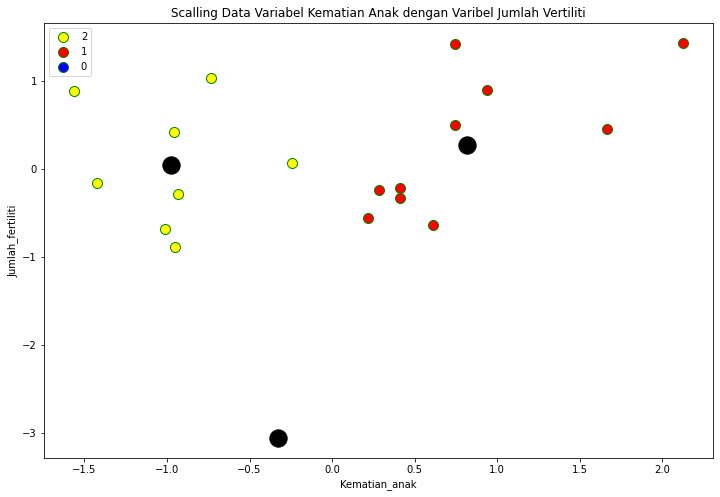

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df2['Kematian_anak'][new_df2.label6_kmeans==2], new_df2['Jumlah_fertiliti'][new_df2.label6_kmeans==2],label='2', c='yellow', s=100, edgecolors='green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label6_kmeans==1], new_df2['Jumlah_fertiliti'][new_df2.label6_kmeans==1],label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df2['Kematian_anak'][new_df2.label6_kmeans==0], new_df2['Jumlah_fertiliti'][new_df2.label6_kmeans==0],label='0', c='blue', s=100, edgecolors='green')


plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kematian_anak')
plt.ylabel('Jumlah_fertiliti')
plt.title('Scalling Data Variabel Kematian Anak dengan Varibel Jumlah Vertiliti')
plt.legend()

plt.show()

In [ ]:
#summary
fix['K_means_labels3'] = kmeans6.labels_
fix

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels,K_means_labels2,K_means_labels3
0,Burundi,764.0,231.0,93.6,6.26,57.7,0,2,2
1,Liberia,700.0,327.0,89.3,5.02,60.8,0,2,2
2,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0,2,1
3,Mozambique,918.0,419.0,101.0,5.56,54.5,0,2,2
4,Malawi,1030.0,459.0,90.5,5.31,53.1,0,2,2
5,Togo,1210.0,488.0,90.3,4.87,58.7,0,2,2
6,Guinea-Bissau,1390.0,547.0,114.0,5.05,55.6,0,2,1
7,Afghanistan,1610.0,553.0,90.2,5.82,56.2,0,2,2
8,Burkina Faso,1430.0,575.0,116.0,5.87,57.9,0,2,1
9,Uganda,1540.0,595.0,81.0,6.15,56.8,0,2,2


In [ ]:
dflast =fix[fix['K_means_labels3']==1].reset_index(drop=True)
dflast

,Negara,Pendapatan,GDPperkapita,Kematian_anak,Jumlah_fertiliti,Harapan_hidup,K_means_labels,K_means_labels2,K_means_labels3
0,"Congo, Dem. Rep.",609.0,334.0,116.0,6.54,57.5,0,2,1
1,Guinea-Bissau,1390.0,547.0,114.0,5.05,55.6,0,2,1
2,Burkina Faso,1430.0,575.0,116.0,5.87,57.9,0,2,1
3,Guinea,1190.0,648.0,109.0,5.34,58.0,0,2,1
4,Mali,1870.0,708.0,137.0,6.55,59.5,0,2,1
5,Benin,1820.0,758.0,111.0,5.36,61.8,0,2,1
6,Cote d'Ivoire,2690.0,1220.0,111.0,5.27,56.3,0,2,1
7,Cameroon,2660.0,1310.0,108.0,5.11,57.3,0,2,1
8,Nigeria,5150.0,2330.0,130.0,5.84,60.5,0,2,1
9,Angola,5900.0,3530.0,119.0,6.16,60.1,0,2,1


10 Negara yang paling membutuhkan bantuan berdasarkan Faktor Ekonomi,Kesehatan dan sosial adalah

In [ ]:
print(dflast.iloc[:, [0]])

             Negara
0  Congo, Dem. Rep.
1     Guinea-Bissau
2      Burkina Faso
3            Guinea
4              Mali
5             Benin
6     Cote d'Ivoire
7          Cameroon
8           Nigeria
9            Angola
